# Synthia's notebook to experiment with the data 

In [77]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
import plotly.express as px

## Load Datasets

In [2]:
NSDUH2021 = readInData("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt")
# display(NSDUH2021.head())

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2799) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


In [3]:
NSDUH2019 = readInData("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt")
# display(NSDUH2019.head())
NSDUH2019.head()

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2575) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,43295143,10/09/2020,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,6613.865847,40004,2
1,65095143,10/09/2020,2,99,99,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,6321.580570,40003,1
2,49405143,10/09/2020,1,99,99,22,9999,99,4,93,...,3.0,2,2,2,2,2,2,5045.607492,40008,1
3,51015143,10/09/2020,2,99,99,991,9991,91,91,91,...,1.0,2,2,2,2,2,2,2419.558820,40031,1
4,31825143,10/09/2020,2,99,99,991,9991,91,91,91,...,3.0,2,2,2,2,2,2,575.225454,40010,2


In [4]:
NSDUH2018 = readInData("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv")
NSDUH2018.head()

/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2525) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,11015143,10/08/2019,1,99,99,12,9999,99,1,20,...,3.0,2,2,1,1,2,2,20783.261908,40001,1
1,86325143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,3,3,2,2,1095.884074,40004,1
2,35425143,10/08/2019,1,99,99,13,9999,99,4,93,...,3.0,2,2,2,2,2,2,374.445005,40017,2
3,98125143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,2,2,2,2,2,2,2421.263435,40038,2
4,15945143,10/08/2019,2,99,99,991,9991,91,91,91,...,2.0,1,2,1,1,2,2,6637.319591,40040,2


In [5]:
CoreTrends2021 = readInData("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv")
# display(CoreTrends2021.head())

In [6]:
CoreTrends2019 = readInData("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv")
# display(CoreTrends2019.head())

In [7]:
CoreTrends2018 = readInData("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv")
display(CoreTrends2018.head())

,respid,sample,comp,int_date,lang,cregion,state,density,usr,qs1,...,inc,party,partyln,hh1,hh3,ql1,ql1a,qc1,weight,cellweight
0,1,1,1,180103,1,1,42,5,U,,...,6,2,,5,4,1,,,1.746359,
1,2,1,1,180103,1,3,45,2,S,,...,4,3,8,2,2,2,2,,1.659764,
2,3,1,1,180103,1,1,34,5,S,,...,4,1,,1,,1,,,0.490804,
3,4,1,1,180103,1,3,24,4,S,,...,2,2,,2,2,1,,,0.947965,
4,5,1,1,180103,1,1,33,2,R,,...,7,1,,3,3,1,,,0.915959,


## Clean up data


###ADMT16 - ADMT21  : How many visits to various types of outpatient facilities for mental health

<br>AGE3: age (intervals of 2, e.g. 1 = age 12 or 13, up to age 65)
<br>IRSEX: gender 1=male, 2=female

<br>ADMT01 : AUINPYR : stayed in hospital for mental health
<br>ADMT25/ADMTREF25 : AURXYR : taken any medication for mental health

<br>YE09 : YEATNDYR : HAs attended some sort of school
<br>YE10 : YESCHFLT : how much they like going to school (1-4, 4=hated it)
<br>YE23b : YEPRBSLV : participated in self-esteem group

<br>NERVE30 : DSTNRV30 : How often felt nervous (1-5, 5=never) in past 30 days
<br>HOPE30 : DSTHOP30 : How often feel hopeless
<br>NOCHR30 : DSTCHR30 : How often felt depressed
<br>DOWN30 : DSTNGD30 : How often feeling down/worthless
<br>WORST30 : DSTWORST : In past year has there been a worse month than current (1-2, 2=No)
<br>DSNERV1 : DSTNRV12 : in WORST30 month, how often felt nervous
<br>DSHOPE : DSTHOP12 : In WORST30 month, how often felt hopeless
<br>DSNOCHR : DSTCHR12 : in WORST30 month, how often felt depressed
<br>DSDOWN : DSTNGD12 : in WORST30 month, how often felt worthless

<br>LICONCEN : IMPCONCN : Difficulty concentrating in their worst month (1-4, 4= severe)
<br>LIGOOUT1 : IMPGOUT : Difficulty leaving house
<br>LISTRAN1 : IMPPEOP : Difficulty dealing with less known people
<br>LISOC1 : IMPSOC : Difficulty participating in social activites
<br>LISOC2 : IMPSOCM : Did mental health problems keep from participating socially

<br>SUI01 : SUICTHNK : Think about suicide in past year
<br>SUI02 : SUIPLANYR :  Plans for suicide

<br>ASC21 : ADDPREV : Long periods of feeling sad


In [8]:
cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]

NSDUH2021_wantedCols = getWantedColumns(NSDUH2021, cols)

In [9]:
#Removed "SUIPLANYR" because its not present
cols = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]

NSDUH2019_wantedCols = getWantedColumns(NSDUH2019, cols)
NSDUH2019_wantedCols.columns

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')

In [10]:
NSDUH2018_wantedCols = getWantedColumns(NSDUH2018, cols)


Core trends variables:

web1a    -	Twitter
web1b    -	Instagram
web1c    -	Facebook 
web1d    -	Snapchat
web1e    -	YouTube

How often use social media, 1-5, 5=less often

sns2a    -	Twitter
sns2b    -	Instagram
sns2c    -	Facebook 
sns2d    -	Snapchat
sns2e    -	YouTube

gender  - gender
age     - age



In [11]:
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]

CoreTrends2021_wantedCols = getWantedColumns(CoreTrends2021, CoreTrends2021Cols)

In [12]:
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2019_wantedCols = getWantedColumns(CoreTrends2019, CoreTrends2019Cols)

In [13]:
# CoreTrends2018Cols = ["respid", "web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2018_wantedCols = getWantedColumns(CoreTrends2018, CoreTrends2018Cols)

In [14]:
CoreTrends2018_wantedCols.head()

,web1a,web1b,web1c,web1d,web1e,sns2a,sns2b,sns2c,sns2d,sns2e,sex,age
0,2,1,1,1,1,,1,1,3,3,2,33
1,2,2,2,2,2,,,,,,2,76
2,2,2,2,2,2,,,,,,2,99
3,2,2,1,2,2,,,3,,,2,60
4,2,2,1,2,1,,,3,,2,1,55


In [15]:
NSDUH2018_wantedCols.columns

Index(['AGE2', 'IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
       'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
       'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
       'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV'],
      dtype='object')

In [16]:
id=['AGE2']
values=['DSTHOP30']

NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols, id, values)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols, id, values)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols, ['AGE3'], values)

In [17]:
print(NSDUH2021_long)

         age  variable  value
0      26-34  DSTHOP30    3.0
1        65+  DSTHOP30    5.0
2      18-25  DSTHOP30    5.0
3      35-49  DSTHOP30    3.0
4      18-25  DSTHOP30    5.0
...      ...       ...    ...
58029  35-49  DSTHOP30    5.0
58030  26-34  DSTHOP30    4.0
58031  18-25  DSTHOP30    5.0
58032  35-49  DSTHOP30    5.0
58033  18-25  DSTHOP30    5.0

[45745 rows x 3 columns]


In [18]:
CoreTrends2021_wantedCols.columns

Index(['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'sns2a', 'sns2b', 'sns2c',
       'sns2d', 'sns2e', 'gender', 'age'],
      dtype='object')

In [19]:
# CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols)
# CoreTrends2018_wantedCols = CoreTrends2018_wantedCols.drop(columns=['sns2a'])
id = ['age']
values = ["sns2b", "sns2c", "sns2d", "sns2e"]
CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols, id, values, 2018)
CoreTrends2019_long = cleanUpCoreTrends(CoreTrends2019_wantedCols, id, values, 2019)
CoreTrends2021_long = cleanUpCoreTrends(CoreTrends2021_wantedCols, id, values, 2021)

In [20]:
print(CoreTrends2018_long['age'].min())
print(NSDUH2018_long)

18-25
         age  variable  value
0      50-64  DSTHOP30    5.0
1      18-25  DSTHOP30    5.0
2      18-25  DSTHOP30    3.0
3      35-49  DSTHOP30    5.0
4      35-49  DSTHOP30    5.0
...      ...       ...    ...
56306  26-34  DSTHOP30    5.0
56307  26-34  DSTHOP30    5.0
56310  18-25  DSTHOP30    5.0
56311  26-34  DSTHOP30    3.0
56312  18-25  DSTHOP30    1.0

[42687 rows x 3 columns]


In [21]:
SMUse_sum_CoreTrends2018 = CoreTrends2018_long.groupby(['age']).agg(count=('value', 'count'))
SMUse_sum_CoreTrends2019 = CoreTrends2019_long.groupby(['age']).agg(count=('value', 'count'))
SMUse_sum_CoreTrends2021 = CoreTrends2021_long.groupby(['age']).agg(count=('value', 'count'))


In [22]:
SMUse_sum_CoreTrends2018 = SMUse_sum_CoreTrends2018.reset_index()
SMUse_sum_CoreTrends2019 = SMUse_sum_CoreTrends2019.reset_index()
SMUse_sum_CoreTrends2021 = SMUse_sum_CoreTrends2021.reset_index()

SMUse_sum_CoreTrends2018['dataset'] = '2018'
SMUse_sum_CoreTrends2019['dataset'] = '2019'
SMUse_sum_CoreTrends2021['dataset'] = '2021'

CoreTrends_SMUseSum_concat = pd.concat([SMUse_sum_CoreTrends2018,SMUse_sum_CoreTrends2019, SMUse_sum_CoreTrends2021])

<Axes: xlabel='age', ylabel='count'>

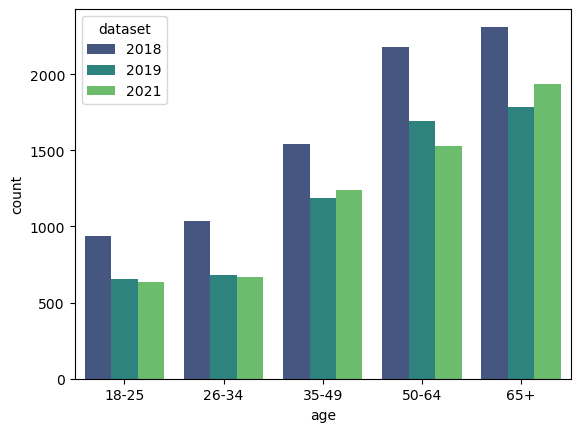

In [23]:
sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='count', hue='dataset' ,palette='viridis')


In [24]:
id=['AGE2']
id2=['AGE3']
# values = ['IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
#             'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
#             'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
#             'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV']
values = ['DSTCHR30']

NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,id,values)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,id,values)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,id2,values)


In [25]:
NSDUH2021_long

,age,variable,value
0,26-34,DSTCHR30,5.0
1,65+,DSTCHR30,5.0
2,18-25,DSTCHR30,5.0
3,35-49,DSTCHR30,3.0
4,18-25,DSTCHR30,5.0
...,...,...,...
58029,35-49,DSTCHR30,5.0
58030,26-34,DSTCHR30,5.0
58031,18-25,DSTCHR30,5.0
58032,35-49,DSTCHR30,5.0


In [48]:
SMUse_sum_NSDUH2018 = NSDUH2018_long.groupby(['age']).agg(count=('value', 'count'))
SMUse_sum_NSDUH2019 = NSDUH2019_long.groupby(['age']).agg(count=('value', 'count'))
SMUse_sum_NSDUH2021 = NSDUH2021_long.groupby(['age']).agg(count=('value', 'count'))

In [49]:
SMUse_sum_NSDUH2021

,count
age,
18-25,13510
26-34,9230
35-49,12152
50-64,5539
65+,5312


In [50]:
SMUse_sum_NSDUH2018 = SMUse_sum_NSDUH2018.reset_index()
SMUse_sum_NSDUH2019 = SMUse_sum_NSDUH2019.reset_index()
SMUse_sum_NSDUH2021 = SMUse_sum_NSDUH2021.reset_index()

SMUse_sum_NSDUH2018['dataset'] = '2018'
SMUse_sum_NSDUH2019['dataset'] = '2019'
SMUse_sum_NSDUH2021['dataset'] = '2021'

NSDUH_concat = pd.concat([SMUse_sum_NSDUH2018,SMUse_sum_NSDUH2019,SMUse_sum_NSDUH2021])
# NSDUH_concat = NSDUH_concat.rename(columns={'AGE2': 'age'})

In [51]:
NSDUH_concat

,age,count,dataset
0,18-25,13529,2018
1,26-34,8720,2018
2,35-49,11592,2018
3,50-64,4909,2018
4,65+,3949,2018
0,18-25,14092,2019
1,26-34,8535,2019
2,35-49,11061,2019
3,50-64,4853,2019
4,65+,3870,2019


In [78]:
sns.barplot(data=NSDUH_concat, x='age', y='count',hue='dataset', palette='viridis')


ValueError: Could not interpret input 'count'

In [53]:
print(NSDUH_concat)
print(CoreTrends_SMUseSum_concat)

     age  count dataset
0  18-25  13529    2018
1  26-34   8720    2018
2  35-49  11592    2018
3  50-64   4909    2018
4    65+   3949    2018
0  18-25  14092    2019
1  26-34   8535    2019
2  35-49  11061    2019
3  50-64   4853    2019
4    65+   3870    2019
0  18-25  13510    2021
1  26-34   9230    2021
2  35-49  12152    2021
3  50-64   5539    2021
4    65+   5312    2021
     age  sum_SMUse dataset
0  18-25        940    2018
1  26-34       1036    2018
2  35-49       1544    2018
3  50-64       2176    2018
4    65+       2312    2018
0  18-25        656    2019
1  26-34        680    2019
2  35-49       1188    2019
3  50-64       1696    2019
4    65+       1788    2019
0  18-25        636    2021
1  26-34        668    2021
2  35-49       1240    2021
3  50-64       1528    2021
4    65+       1936    2021


In [54]:
NSDUH_concat = NSDUH_concat.rename(columns={'count': 'DSTCHR30'})
CoreTrends_SMUseSum_concat = CoreTrends_SMUseSum_concat.rename(columns={'count': 'sum_SMUse'})
print(NSDUH_concat)
print(CoreTrends_SMUseSum_concat)

     age  DSTCHR30 dataset
0  18-25     13529    2018
1  26-34      8720    2018
2  35-49     11592    2018
3  50-64      4909    2018
4    65+      3949    2018
0  18-25     14092    2019
1  26-34      8535    2019
2  35-49     11061    2019
3  50-64      4853    2019
4    65+      3870    2019
0  18-25     13510    2021
1  26-34      9230    2021
2  35-49     12152    2021
3  50-64      5539    2021
4    65+      5312    2021
     age  sum_SMUse dataset
0  18-25        940    2018
1  26-34       1036    2018
2  35-49       1544    2018
3  50-64       2176    2018
4    65+       2312    2018
0  18-25        656    2019
1  26-34        680    2019
2  35-49       1188    2019
3  50-64       1696    2019
4    65+       1788    2019
0  18-25        636    2021
1  26-34        668    2021
2  35-49       1240    2021
3  50-64       1528    2021
4    65+       1936    2021


In [56]:
CoreTrends_NSDUH_merge_test = pd.merge(NSDUH_concat, CoreTrends_SMUseSum_concat, on=['age','dataset'], how='left')


In [38]:
CoreTrends_NSDUH_merge_test.reset_index()
CoreTrends_NSDUH_merge_test

,age,DSTHOP30,dataset,sum_SMUse
0,18-25,13529,2018,940
1,26-34,8720,2018,1036
2,35-49,11592,2018,1544
3,50-64,4909,2018,2176
4,65+,3949,2018,2312
5,18-25,14092,2019,656
6,26-34,8535,2019,680
7,35-49,11061,2019,1188
8,50-64,4853,2019,1696
9,65+,3870,2019,1788


In [ ]:
CoreTrends_NSDUH_merge_scatter = pd.merge(NSDUH_concat, CoreTrends_SMUseSum_concat, on=['age','dataset'], how='left')

In [74]:
SMUse_sum_NSDUH2021 = SMUse_sum_NSDUH2021.rename(columns={'count': 'DSTCHR30'})
SMUse_sum_CoreTrends2021 = SMUse_sum_CoreTrends2021.rename(columns={'count': 'sum_SMUse'})
merged_CoreTrendsNSDUH2021 = pd.merge(SMUse_sum_NSDUH2021,SMUse_sum_CoreTrends2021, on='age', how='left' )

In [75]:
merged_CoreTrendsNSDUH2021

,age,DSTCHR30,dataset_x,sum_SMUse,dataset_y
0,18-25,13510,2021,636,2021
1,26-34,9230,2021,668,2021
2,35-49,12152,2021,1240,2021
3,50-64,5539,2021,1528,2021
4,65+,5312,2021,1936,2021


/Users/synth/anaconda3/envs/cs418/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/synth/anaconda3/envs/cs418/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


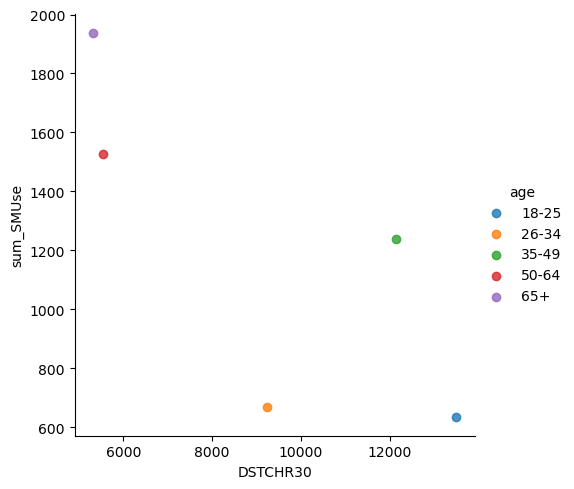

In [81]:
sns.lmplot(data=merged_CoreTrendsNSDUH2021, x='DSTCHR30', y='sum_SMUse', hue='age')

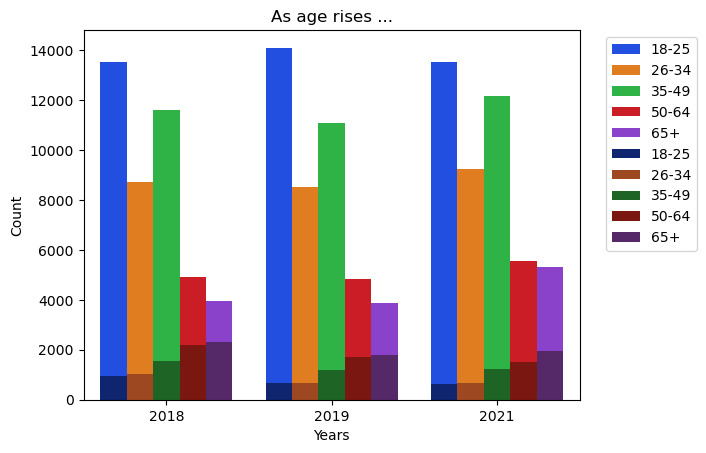

In [83]:
# sns.lineplot(data=CoreTrends_SMUseSum_concat, x='dataset', y='count', hue='age', marker='o')
# sns.lineplot(data=NSDUH_concat, x='dataset', y='count', hue='age', marker='o')
# plt.show()

sns.barplot(data=CoreTrends_NSDUH_merge_test, x='dataset', y='DSTCHR30', hue='age',  palette= 'bright')
sns.barplot(data=CoreTrends_NSDUH_merge_test, x='dataset', y='sum_SMUse', hue='age',palette= 'dark')
plt.ylabel("Count")
plt.xlabel("Years")
plt.title("As age rises ...")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
